## **One-hot**
Với mỗi điểm dữ liệu xi đặt yi = [ yi1, yi2, …, yiK ] là label vector của nó

Nếu xi được phân vào cluster k thì yik = 1 và yij = 0 , ∀ j ≠ k . 

Điều này có nghĩa là có đúng một phần tử của vector yi là bằng 1 (tương ứng với cluster của xi ), các phần tử còn lại bằng 0. 

Ví dụ: nếu một điểm dữ liệu có label vector là [ 1 , 0 , 0 , … , 0 ] thì nó thuộc vào cluster 1, là [ 0 , 1 , 0 , … , 0 ] thì nó thuộc vào cluster 2, … . 

Cách mã hóa label của dữ liệu như thế này được gọi là biểu diễn **one-hot**.

## **Clustering**
### Algorithm
Đầu vào: Dữ liệu X và số lượng cluster cần tìm K.

Đầu ra: Các center M và label vector cho từng điểm dữ liệu Y.

- B1: Chọn K điểm bất kỳ làm các center ban đầu.

- B2: Phân mỗi điểm dữ liệu vào cluster có center gần nó nhất.

- B3: Nếu việc gán dữ liệu vào từng cluster ở bước 2 không thay đổi so với vòng lặp trước nó thì ta dừng thuật toán.

- B4: Cập nhật center cho từng cluster bằng cách lấy trung bình cộng của tất các các điểm dữ liệu đã được gán vào cluster đó sau bước 2.

- B5: Quay lại bước 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [2]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

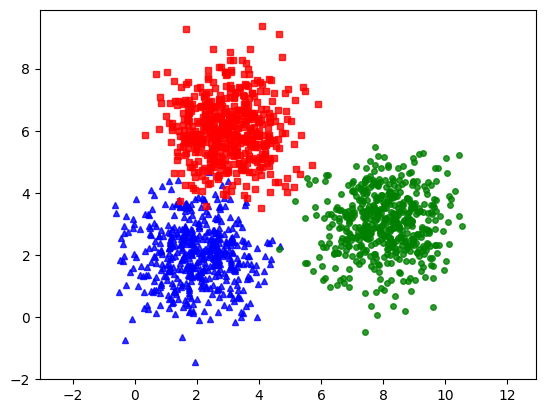

In [3]:
# Data visualization
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [4]:
def kmeans_init_centers(X, k):
    '''
    Randomly pick k rows of X as initial centers,
    Khởi tạo các centers ban đầu.
    '''
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    '''
    calculate pairwise distances btw data and centers
    Gán nhán mới cho các điểm khi biết các centers.
    '''
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    '''
    Cập nhật các centers mới dựa trên dữ liệu vừa được gán nhãn.
    '''
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    '''
    Kiểm tra điều kiện dừng của thuật toán.
    '''
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

K-means algorithm

In [5]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


C:\Users\Nhi\AppData\Local\Temp\ipykernel_8440\3259603088.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


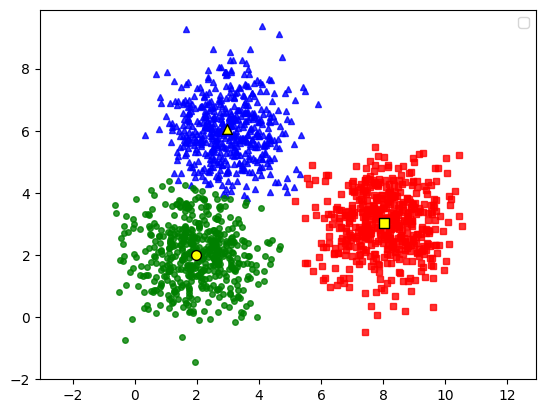

In [6]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

def kmeans_result_display(X, label, centers):
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize=4, alpha=.8, zorder = 1)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize=4, alpha=.8, zorder = 1)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize=4, alpha=.8, zorder = 1)

    # Centroid
    plt.scatter(centers[0,0], centers[0,1],
                c='yellow', edgecolors='black',
                s=50, marker='^', zorder=2)
    plt.scatter(centers[1,0], centers[1,1],
                c='yellow', edgecolors='black',
                s=50, marker='o', zorder=2)
    plt.scatter(centers[2,0], centers[2,1],
                c='yellow', edgecolors='black',
                s=50, marker='s', zorder=2)

    plt.axis('equal')
    plt.legend()
    plt.show()

kmeans_result_display(X, labels[-1], centers[-1])